In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_text

In [20]:
d=pd.read_csv("Iris.csv")
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


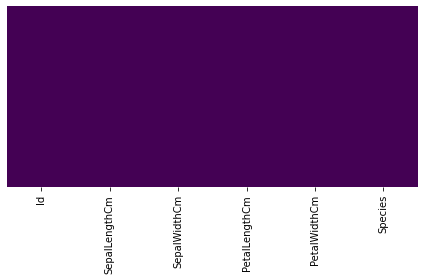

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
def get_heatmap(d):
    plt.figure(figsize=(6,4))
    sns.heatmap(d.isnull(),yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()
get_heatmap(d)


In [22]:
from sklearn import preprocessing
LE= preprocessing.LabelEncoder()
d.Species = LE.fit_transform(d.Species)
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [23]:
x=d.drop('Species',axis=1)
y=d['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [24]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
71,72,6.1,2.8,4.0,1.3
11,12,4.8,3.4,1.6,0.2
88,89,5.6,3.0,4.1,1.3
114,115,5.8,2.8,5.1,2.4
32,33,5.2,4.1,1.5,0.1


In [25]:
model=DecisionTreeClassifier(random_state=0,max_depth=3)
s=model.fit(x_train,y_train)
s1=export_text(s)
print(s1)
pred=model.predict(x_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

|--- feature_4 <= 0.80
|   |--- class: 0
|--- feature_4 >  0.80
|   |--- feature_0 <= 101.00
|   |   |--- class: 1
|   |--- feature_0 >  101.00
|   |   |--- class: 2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        26

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[24  0  0]
 [ 0 25  0]
 [ 0  1 25]]


In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,pred)*100)

Accuracy:  98.66666666666667


In [28]:
id=int(input())
sepallength=int(input())
sepalwidth=int(input())
petallength=int(input())
petalwidth=int(input())
d={ 'id':[id],'sepallength':[sepallength],'sepalwidth':[sepalwidth],'petallength':[petallength],'petalwidth':[petalwidth]}
d=pd.DataFrame(d)

In [29]:
d

,id,sepallength,sepalwidth,petallength,petalwidth
0,2,2,2,2,2


In [30]:
y_pred=model.predict(d)

c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
- petallength
- petalwidth
- sepallength
- sepalwidth
Feature names seen at fit time, yet now missing:
- Id
- PetalLengthCm
- PetalWidthCm
- SepalLengthCm
- SepalWidthCm

  warnings.warn(message, FutureWarning)


In [31]:
y_pred

array([1])